Importing all the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np

Reading the dataset

In [2]:
df=pd.read_csv('Real_Estate.csv')
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [37]:
df.shape

(414, 7)

The Dataset Consists of 7 columns:

1.Transaction date:

  The date of the real estate transaction,this may not be a effective factor in predicting the price of the property.

2.House age:

  Age of the property in years,this is one of the most important factor in predicting price of the property.

3.Distance to the nearest MRT station:
  
  It is the distance to the nearest Metro Station.In today's scenario it is become mandatory that the property is accesible to all types of logistics especially METRO

4.Number of convience stores:

  It is a neccesity that the convience stores nearby the property.But the growing trend of online businesses makes it almost vulnerable.

5.Latitude:

  Latitude of the property location

6.Longitude:

  Longitude of the property location

7.House price of unit area:

  This is the target attribute of the dataset.

EDA(EXPLORATORY DATA ANALYSIS)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


There is only one object datatype in the dataset i.e 'Transaction Date'

The other columns have continuous values i.e(having datatypes int,float)

In [4]:
df.describe()
df['Number of convenience stores'].astype(int)

0       8
1       2
2      10
3       5
4       6
       ..
409     6
410     2
411     8
412     5
413     6
Name: Number of convenience stores, Length: 414, dtype: int32

This is the 5 number summary of the dataset

In [5]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

There are no missing values in the dataset.

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

There are no duplicate values in the dataset

<Axes: xlabel='Latitude', ylabel='House price of unit area'>

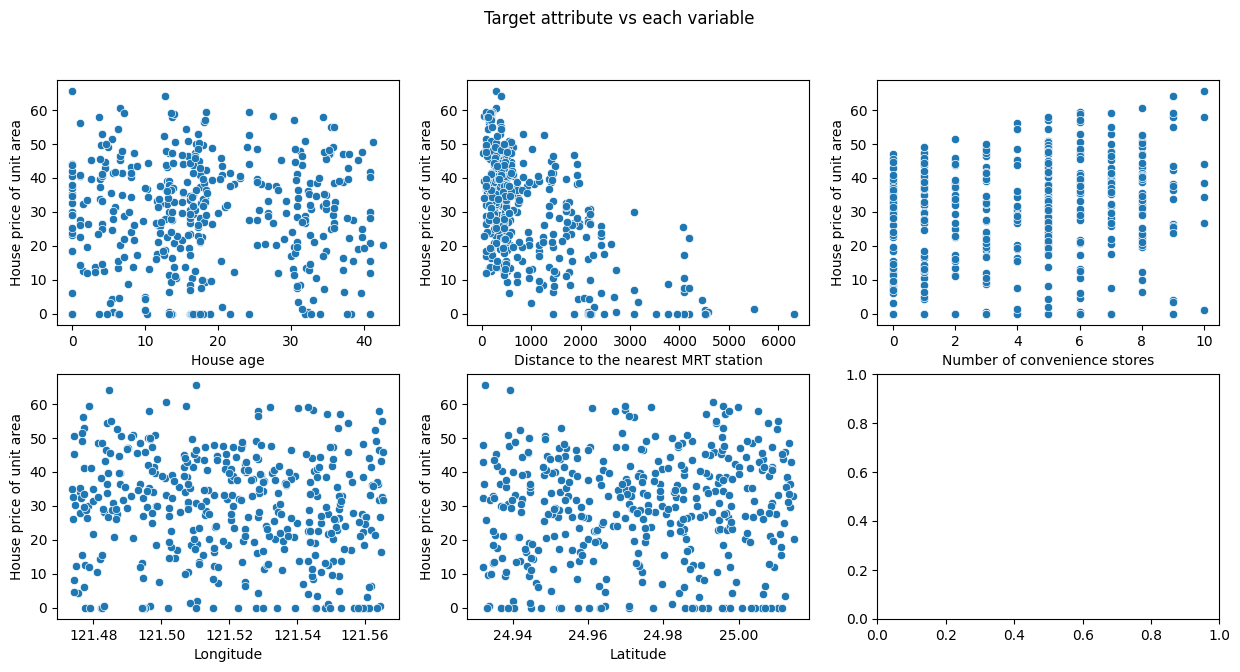

In [7]:
fig,axes=plt.subplots(2,3,figsize=(15,7))
fig.suptitle("Target attribute vs each variable")
sns.scatterplot(ax=axes[0,0],data=df,x='House age',y='House price of unit area')
sns.scatterplot(ax=axes[0,1],data=df,x='Distance to the nearest MRT station',y='House price of unit area')
sns.scatterplot(ax=axes[0,2],data=df,x='Number of convenience stores',y='House price of unit area')
sns.scatterplot(ax=axes[1,0],data=df,x='Longitude',y='House price of unit area')
sns.scatterplot(ax=axes[1,1],data=df,x='Latitude',y='House price of unit area')



The above scatter plots provide insights into the each independent attribute vs the target attribute 

1.House age vs House price:

  There is almost slight increase in price in the no of newer properties

2.Distance to nearest Metro station vs House price:
  
  The properties that are located closer to metro station have higher price than properties that are located away from it.

3.No of Convenience stores vs house price:
  
  No of Convenience stores is directly proportional to the house price.We can't say that it is directly proportional but more no of convenience stores increases the price of the property.

4.Latitude and Longitude:
  
  While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices.  

<Axes: xlabel='Longitude', ylabel='Count'>

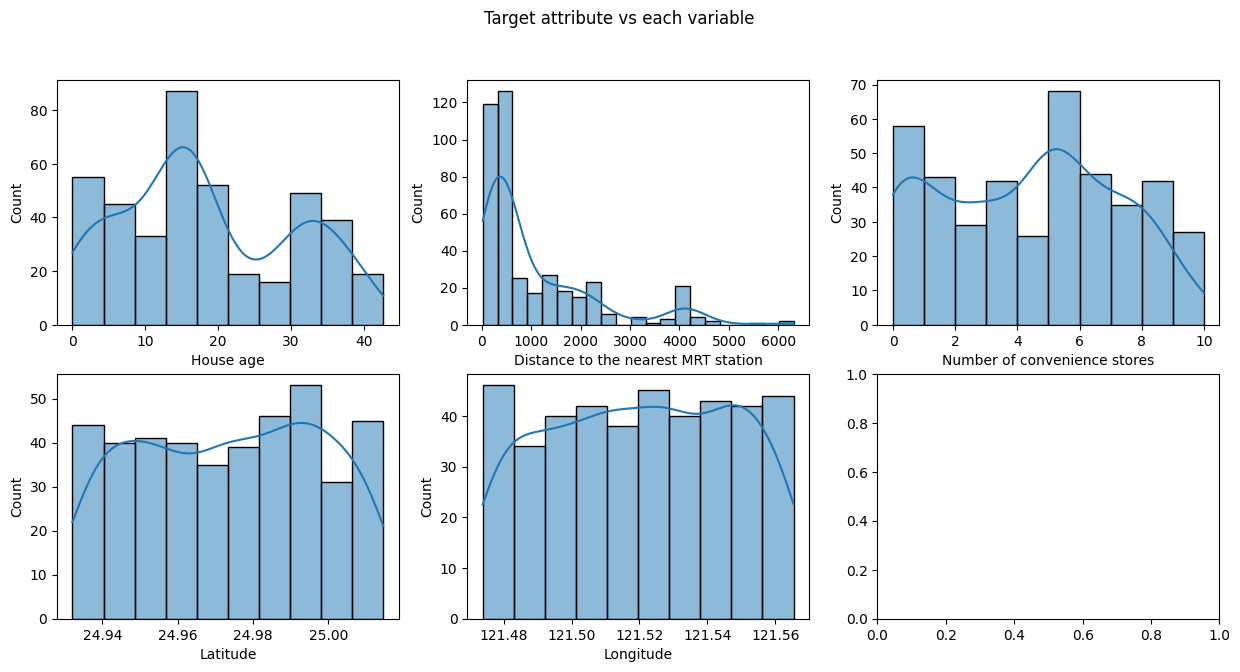

In [8]:
fig,axes=plt.subplots(2,3,figsize=(15,7))
fig.suptitle("Target attribute vs each variable")
sns.histplot(ax=axes[0,0],data=df,x=df['House age'],kde=True)
sns.histplot(ax=axes[0,1],data=df,x=df['Distance to the nearest MRT station'],kde=True)
sns.histplot(ax=axes[0,2],data=df,x=df['Number of convenience stores'],kde=True)
sns.histplot(ax=axes[1,0],data=df,x=df['Latitude'],kde=True)
sns.histplot(ax=axes[1,1],data=df,x=df['Longitude'],kde=True)

The histograms provide insights into the distribution of each variable:

House Age:
 
  This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).

Distance to the Nearest MRT Station:
 
  Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

Number of Convenience Stores:
  Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.

Latitude and Longitude: 

  Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.

House Price of Unit Area: 

  Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.


In [9]:
df.iloc[:,1:7].corr()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:

House Age: 

This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.

Distance to Nearest MRT Station: 

Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.

Number of Convenience Stores: 

Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.

Latitude and Longitude: 

Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

Text(0.5, 1.0, 'Correlation Matrix')

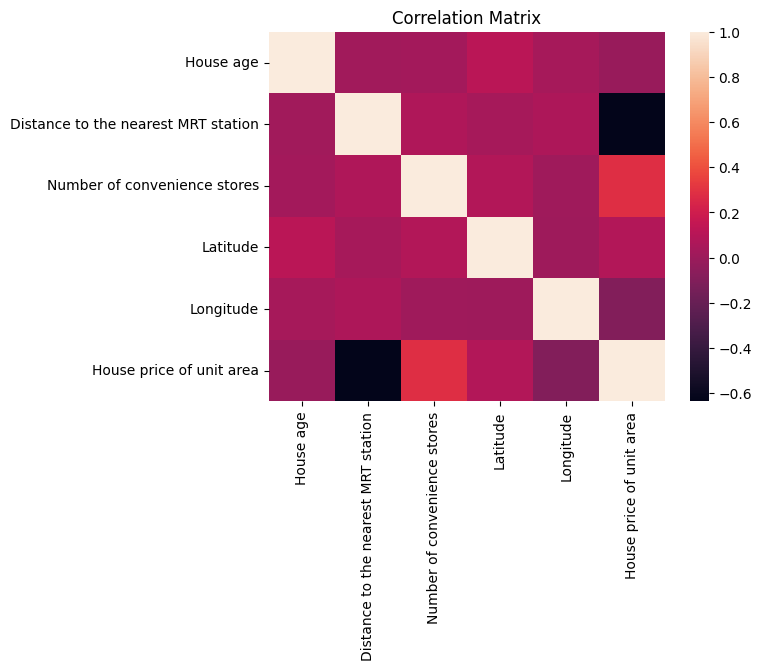

In [10]:
corr=df.iloc[:,1:7].corr()
sns.heatmap(corr)
plt.title('Correlation Matrix')

Building a Regression Model to predict the prices using Linear Regression algorithm

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,precision_score,recall_score

Selecting the dependent and independent variables

In [12]:
X=df.iloc[:,1:6]
y=df.iloc[:,-1]
#y=df['House price of unit area']

In [13]:
X

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,13.3,4082.01500,8,25.007059,121.561694
1,35.5,274.01440,2,25.012148,121.546990
2,1.1,1978.67100,10,25.003850,121.528336
3,22.2,1055.06700,5,24.962887,121.482178
4,8.5,967.40000,6,25.011037,121.479946
...,...,...,...,...,...
409,18.3,170.12890,6,24.981186,121.486798
410,11.9,323.69120,2,24.950070,121.483918
411,0.0,451.64190,8,24.963901,121.543387
412,35.9,292.99780,5,24.997863,121.558286


In [14]:
y

0       6.488673
1      24.970725
2      26.694267
3      38.091638
4      21.654710
         ...    
409    29.096310
410    33.871347
411    25.255105
412    25.285620
413    37.580554
Name: House price of unit area, Length: 414, dtype: float64

In [27]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [31]:
X=scalar.fit_transform(X)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [33]:
X_train

array([[0.3559719 , 0.08420716, 0.5       , 0.78826701, 0.77094293],
       [0.84074941, 0.01067574, 0.5       , 0.32337176, 0.99075374],
       [0.32084309, 0.02709023, 0.1       , 0.13910147, 0.45413031],
       ...,
       [0.71194379, 0.06696896, 0.        , 0.22714298, 0.77229597],
       [0.46838407, 0.08420716, 0.1       , 0.31502666, 0.03798168],
       [0.81733021, 0.34407516, 0.6       , 0.93100895, 0.12889152]])

In [34]:
X_test

array([[3.55971897e-01, 6.48963036e-02, 7.00000000e-01, 6.87670894e-01,
        9.65883905e-01],
       [4.21545667e-01, 2.12765409e-01, 8.00000000e-01, 2.63340395e-01,
        1.00000000e+00],
       [1.31147541e-01, 3.61700578e-02, 1.00000000e-01, 9.20677356e-01,
        9.04176891e-01],
       [8.40749415e-01, 2.94468292e-02, 9.00000000e-01, 9.49505629e-01,
        9.96783564e-01],
       [7.18969555e-01, 2.21471441e-01, 2.00000000e-01, 8.23681663e-01,
        6.02829473e-01],
       [1.54566745e-01, 6.96697076e-02, 4.00000000e-01, 4.25641642e-02,
        5.57716021e-03],
       [8.73536300e-01, 2.27023928e-01, 1.00000000e-01, 3.73122455e-01,
        5.54758673e-01],
       [2.95081967e-01, 2.94468292e-02, 2.00000000e-01, 2.43893655e-01,
        6.81501048e-01],
       [8.40749415e-01, 2.48411061e-02, 2.00000000e-01, 7.81591535e-01,
        3.67596241e-01],
       [1.77985948e-01, 5.96633661e-01, 3.00000000e-01, 6.94476897e-01,
        2.27479219e-01],
       [8.14988290e-01, 4.0712

In [18]:
y_test

358    35.762667
350    31.743662
373    27.786894
399    54.831664
369    39.416482
         ...    
268    39.740178
148    47.254929
16     13.673532
66     37.562445
341    32.007813
Name: House price of unit area, Length: 125, dtype: float64

In [19]:
y_train

7      44.116585
194    26.782369
19     16.444017
176    13.794808
367    22.491470
         ...    
71     25.696463
106    42.829193
270    11.277817
348    29.726401
102    30.850929
Name: House price of unit area, Length: 289, dtype: float64

In [26]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

In [ ]:
scalar.fit_transform()

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_models(X_train, y_train, X_test, y_test, models):
    """
    Evaluate multiple regression models to find the best one based on R2 score and accuracy.
    
    Parameters:
    X_train: Training features
    y_train: Training labels
    X_test: Testing features
    y_test: Testing labels
    models: Dictionary of models with names as keys and model instances as values
    
    Returns:
    best_model: The model with the highest R2 score
    results: Dictionary containing evaluation metrics for each model
    """
    results = {}
    best_model = None
    best_r2 = -np.inf  # Set to -infinity initially to find the highest R² score

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Store the results
        results[name] = {
            'R2 Score': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        }
        
        # Update best model based on R2 score
        if r2 > best_r2:
            best_r2 = r2
            best_model = model

    return best_model, results


In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Import external libraries if installed
try:
    from xgboost import XGBRegressor
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
except ImportError:
    XGBRegressor, LGBMRegressor, CatBoostRegressor = None, None, None

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'SGD Regressor': SGDRegressor(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNN Regressor': KNeighborsRegressor()
}

# Add models requiring additional packages if available
if XGBRegressor:
    models['XGBoost Regressor'] = XGBRegressor()
if LGBMRegressor:
    models['LightGBM Regressor'] = LGBMRegressor()
if CatBoostRegressor:
    models['CatBoost Regressor'] = CatBoostRegressor()

# Polynomial regression as an example
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
models['Polynomial Regression'] = LinearRegression().fit(X_train_poly, y_train)

# Evaluate models
best_model, results = evaluate_models(X_train, y_train, X_test, y_test, models)
print("Best Model:", best_model)
print("Results:", results)
model=pd.DataFrame(results)


Best Model: LinearRegression()
Results: {'Linear Regression': {'R2 Score': 0.5467318215995006, 'MAE': 9.664464382791593, 'MSE': 130.9642851547082, 'RMSE': 11.443962825643405}, 'Ridge Regression': {'R2 Score': 0.5289110867245509, 'MAE': 9.867266497505296, 'MSE': 136.11328946395665, 'RMSE': 11.666760024272234}, 'Lasso Regression': {'R2 Score': 0.3071289161408317, 'MAE': 12.18264495679957, 'MSE': 200.19355102798866, 'RMSE': 14.148977031149236}, 'ElasticNet Regression': {'R2 Score': 0.03855100861559446, 'MAE': 14.037962944401928, 'MSE': 277.79466079817604, 'RMSE': 16.667173149582865}, 'SGD Regressor': {'R2 Score': 0.5365364968962577, 'MAE': 9.77195067860789, 'MSE': 133.91005429383483, 'RMSE': 11.571951187843597}, 'SVR': {'R2 Score': 0.2654803938427601, 'MAE': 12.417844795918668, 'MSE': 212.2271973557867, 'RMSE': 14.568019678590042}, 'Decision Tree': {'R2 Score': 0.1967201702272927, 'MAE': 12.104713719284591, 'MSE': 232.0943178861867, 'RMSE': 15.234642033411442}, 'Random Forest': {'R2 Score

In [41]:
model_trans=model.transpose()
model_trans.sort_values('R2 Score',ascending=False)

,R2 Score,MAE,MSE,RMSE
Linear Regression,0.546732,9.664464,130.964285,11.443963
Polynomial Regression,0.546732,9.664464,130.964285,11.443963
SGD Regressor,0.536536,9.771951,133.910054,11.571951
AdaBoost,0.535114,9.968227,134.320993,11.589693
Ridge Regression,0.528911,9.867266,136.113289,11.666760
Random Forest,0.525587,9.655760,137.073675,11.707847
KNN Regressor,0.421945,10.619642,167.019393,12.923598
Lasso Regression,0.307129,12.182645,200.193551,14.148977
SVR,0.265480,12.417845,212.227197,14.568020
Decision Tree,0.196720,12.104714,232.094318,15.234642


In [42]:
model_new=LinearRegression()
model_new.fit(X_train,y_train)
y_pred=model_new.predict(X_test)

In [46]:
y.shape

(414,)

In [47]:
y_pred.shape

(125,)

In [48]:
r2_score(y_test,y_pred)

0.5467318215995006

Text(0.5, 1.0, 'Actual vs Predicted')

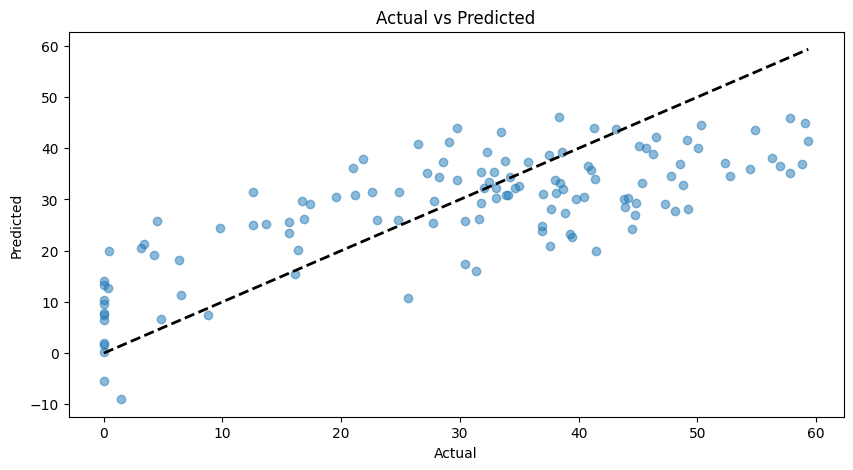

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. 

From the plot, we can observe:

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a 
significant portion of the test set.

Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the 
actual values.

So, this is how we can predict real estate prices with Machine Learning using Python.